# **STOCK MARKET ANALYSIS**
AIM: TO ANALYSE THE TOP 50 STOCKS AT THE NSE (NIFTY50) AND UNDERSTAND THEIR TREND. ALSO TO FIND THE STOCKS AND SECTOR WITH THE MOST POTENTIAL BASED ON THE HISTORICAL DATA.



# **1.DATA LOADING AND PREPERATIONS**




In [ ]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Define the path to the CSV file
csv_path = r"/content/drive/MyDrive/Colab Notebooks/finalset.csv"

In [ ]:
# Load the dataset
df = pd.read_csv(csv_path,  header=1)

In [ ]:
# Display basic information and the first few rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Symbol           50 non-null     object 
 1   Open             50 non-null     object 
 2   High             50 non-null     object 
 3   Low              50 non-null     object 
 4   LTP              50 non-null     object 
 5   Chng             50 non-null     float64
 6   % Chng           50 non-null     float64
 7   Volume (lacs)    50 non-null     float64
 8   Turnover (crs.)  50 non-null     object 
 9   52w H            50 non-null     object 
 10  52w L            50 non-null     object 
 11  365 d % chng     50 non-null     float64
 12  30 d % chng      50 non-null     float64
 13  Sector           50 non-null     object 
dtypes: float64(5), object(9)
memory usage: 5.6+ KB


In [ ]:
# Display basic information and the first few rows
df.head()

,Symbol,Open,High,Low,LTP,Chng,% Chng,Volume (lacs),Turnover (crs.),52w H,52w L,365 d % chng,30 d % chng,Sector
0,ADANIPORTS,750,766,713.25,715,-47.45,-6.22,72.20,532.63,901,384.4,79.22,-4.65,Infrastructure & Construction
1,ASIANPAINT,"3,101.00","3,167.35","3,091.00","3,138.00",-6.25,-0.20,10.29,322.53,"3,505.00","2,117.15",45.66,5.66,Consumer Goods
2,AXISBANK,669,674.9,660.45,661,-18.90,-2.78,102.53,684,866.9,568.4,10.19,-21.49,Banking & Financial Services
3,BAJAJ-AUTO,"3,370.00","3,383.50","3,320.00","3,335.00",-56.70,-1.67,3.42,114.59,"4,361.40","3,041.00",9.30,-12.05,Automobiles & Auto Ancillaries
4,BAJAJFINSV,"17,200.00","17,237.20","16,610.00","16,684.00",-684.85,-3.94,3.42,576.79,"19,325.00","8,273.70",91.38,-9.10,Banking & Financial Services


---
# **Inference**
     
*   Rows-50, Columns-14
*   Missing values- None
*   Data Types- object, float



---


# **2.DATA CLEANING**

In [ ]:
# Columns to convert to numeric values after removing commas
numeric_columns = ["Open", "High", "Low", "LTP", "Turnover (crs.)", "52w H", "52w L"]

In [ ]:
# Remove commas and convert to float
for col in numeric_columns:
    df[col] = df[col].astype(str).str.replace(',', '').astype(float)

---
# **Inference**

Why remove commas?

1.  Commas are formatting symbols in large numbers (e.g., "1,234.56" instead of 1234.56).
2.   Python treats these values as strings rather than numbers.
2.   Mathematical operations (e.g., correlations, averages, visualizations) won't work on strings.


---

In [ ]:
# Display basic information and the first few rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Symbol           50 non-null     object 
 1   Open             50 non-null     float64
 2   High             50 non-null     float64
 3   Low              50 non-null     float64
 4   LTP              50 non-null     float64
 5   Chng             50 non-null     float64
 6   % Chng           50 non-null     float64
 7   Volume (lacs)    50 non-null     float64
 8   Turnover (crs.)  50 non-null     float64
 9   52w H            50 non-null     float64
 10  52w L            50 non-null     float64
 11  365 d % chng     50 non-null     float64
 12  30 d % chng      50 non-null     float64
 13  Sector           50 non-null     object 
dtypes: float64(12), object(2)
memory usage: 5.6+ KB


In [ ]:
# Verify the changes
df.head()

,Symbol,Open,High,Low,LTP,Chng,% Chng,Volume (lacs),Turnover (crs.),52w H,52w L,365 d % chng,30 d % chng,Sector
0,ADANIPORTS,750.0,766.00,713.25,715.0,-47.45,-6.22,72.20,532.63,901.0,384.40,79.22,-4.65,Infrastructure & Construction
1,ASIANPAINT,3101.0,3167.35,3091.00,3138.0,-6.25,-0.20,10.29,322.53,3505.0,2117.15,45.66,5.66,Consumer Goods
2,AXISBANK,669.0,674.90,660.45,661.0,-18.90,-2.78,102.53,684.00,866.9,568.40,10.19,-21.49,Banking & Financial Services
3,BAJAJ-AUTO,3370.0,3383.50,3320.00,3335.0,-56.70,-1.67,3.42,114.59,4361.4,3041.00,9.30,-12.05,Automobiles & Auto Ancillaries
4,BAJAJFINSV,17200.0,17237.20,16610.00,16684.0,-684.85,-3.94,3.42,576.79,19325.0,8273.70,91.38,-9.10,Banking & Financial Services


---


# **Inference**



1.   all the commas have been removed.
1.   'symbol' is left as 'object' data type.
1.    rest every column is in 'float' data type.


---

# **3.ANALYSIS And visualization**

*   top 10 growing stocks
*   stock distribution according to the sector and sector with most growth

In [ ]:
#top 10 stocks with max growth
def find_top_10_growth_companies(df):
  sorted_df = df.sort_values(by=['365 d % chng'], ascending=False)
  top_10_growth_companies = sorted_df.head(10)
  return top_10_growth_companies
top_10_growth = find_top_10_growth_companies(df)
display(top_10_growth[['Symbol', '365 d % chng', 'Sector']])


,Symbol,365 d % chng,Sector
42,TATAMOTORS,167.95,Automobiles & Auto Ancillaries
43,TATASTEEL,105.13,Metals & Mining
14,GRASIM,99.95,Infrastructure & Construction
38,SBIN,93.42,Banking & Financial Services
4,BAJAJFINSV,91.38,Banking & Financial Services
20,HINDALCO,86.93,Metals & Mining
27,JSWSTEEL,86.25,Metals & Mining
34,ONGC,82.86,Energy & Utilities
0,ADANIPORTS,79.22,Infrastructure & Construction
49,WIPRO,77.51,Information Technology


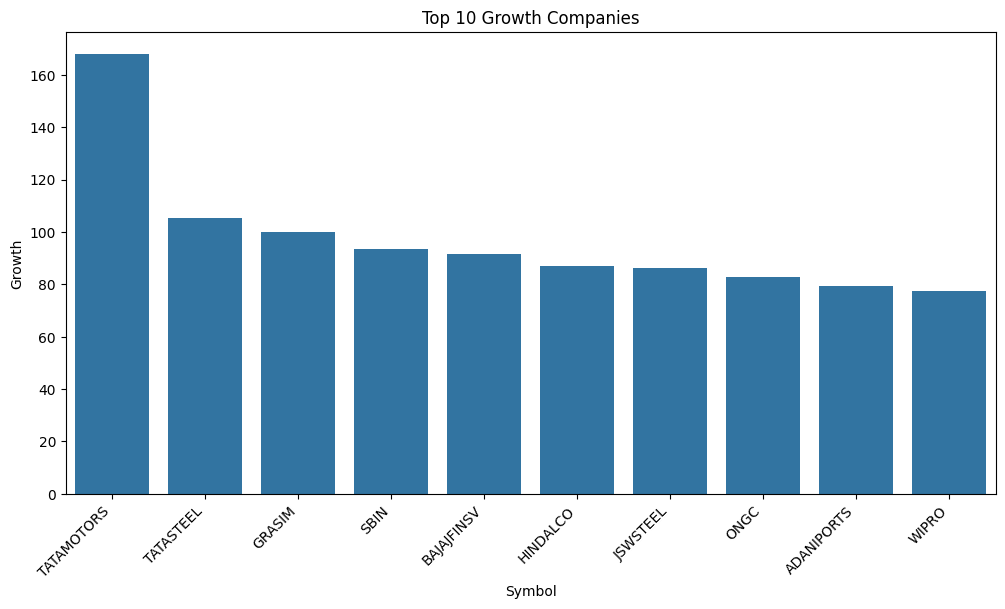

In [ ]:
# Calculate Percentage Change over 365 days (Make sure this cell is executed)
df['Growth'] = df['365 d % chng']

# Bar Chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Symbol', y='Growth', data=top_10_growth)
plt.title('Top 10 Growth Companies')
plt.xticks(rotation=45, ha='right')
plt.show()

highest_growth_sector = df.groupby('Sector')['Growth'].mean().idxmax()

---


# **Inference**
*   The above bar graph shows the top 10 companies with the maximum growth.


---


In [ ]:
#sector with max growth
df['Growth'] = df['365 d % chng']
sector_growth = df.groupby('Sector')['Growth'].mean().sort_values(ascending=False)
print("\nSector with Maximum Growth:\n", sector_growth.head(1))


Sector with Maximum Growth:
 Sector
Metals & Mining    86.5925
Name: Growth, dtype: float64


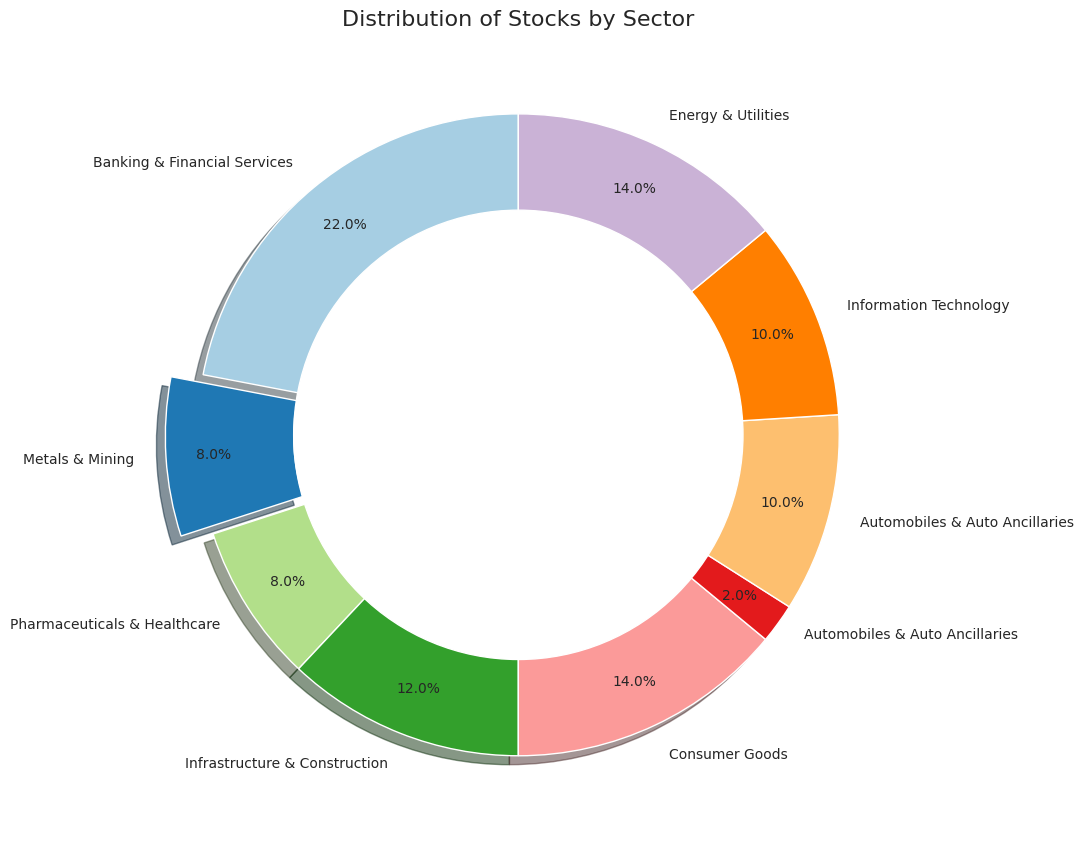

In [ ]:
#Distribution of stocks by sector
sectors = sector_distribution.index.tolist()
np.random.shuffle(sectors)
sector_distribution = sector_distribution.reindex(sectors)

# Create the pie chart
plt.figure(figsize=(25, 10.42))
explode = [0.1 if sector == highest_growth_sector else 0 for sector in sectors]


plt.pie(sector_distribution,
        labels=sector_distribution.index,
        autopct='%1.1f%%',
        startangle=90,
        explode=explode,
        shadow=True,
        pctdistance=0.85,
        colors=plt.cm.Paired.colors,
        wedgeprops=dict(width=0.4, edgecolor='w'))


plt.title("Distribution of Stocks by Sector", fontsize=16)
plt.gca().add_artist(plt.Circle((0, 0), 0.70, fc='white'))
plt.show()



---


# **Inference**
*   The above pie chart shows that Metals and Mining sector incorporates for 8% with the maximum growth.


---






# **Market analysis for 365 days**

In [ ]:
# Set Seaborn style
sns.set_style("whitegrid")

Text(0, 0.5, 'Frequency')

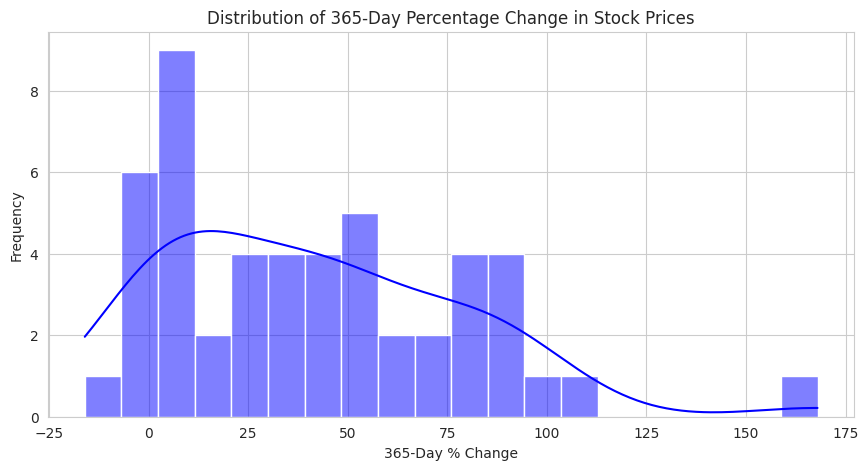

In [ ]:
# Plot Distribution of Percentage Change Over 365 Days
plt.figure(figsize=(10.4, 5))
sns.histplot(df["365 d % chng"], bins=20, kde=True, color="blue")
plt.title("Distribution of 365-Day Percentage Change in Stock Prices")
plt.xlabel("365-Day % Change")
plt.ylabel("Frequency")



---


# **Inference**
**Observations from the Histogram**

*   The histogram shows the distribution of percentage change in stock prices over the last year (365 days).
*   The majority of stocks have a moderate change, clustering around a central value.
*   Some stocks show very high positive growth, indicating significant price appreciation.
*   A few stocks exhibit negative performance, signifying losses over the year.


**Key Insights**


*   Most stocks have positive growth, suggesting an overall bullish market trend.
*   There are a few outliers with extreme gains or losses, possibly due to major corporate announcements, economic events, or sector-specific trends.







---







Text(0, 0.5, 'LTP')

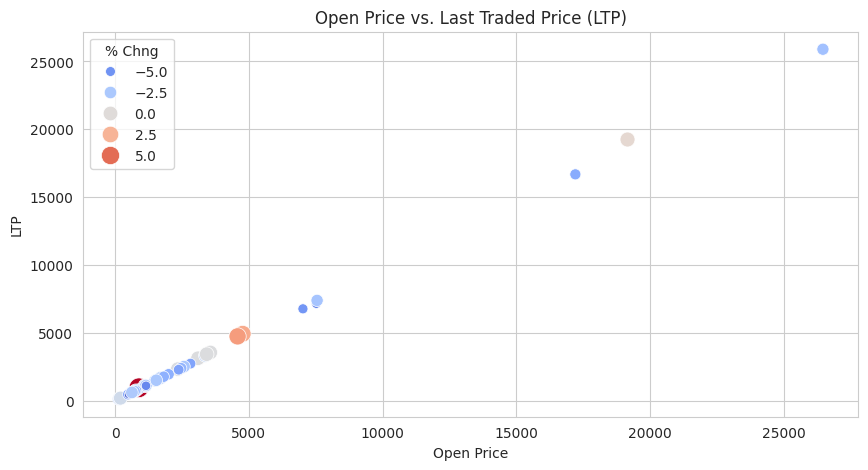

In [ ]:
# Scatter Plot of Open vs. Close Price (LTP)
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df["Open"], y=df["LTP"], hue=df["% Chng"], palette="coolwarm", size=df["% Chng"], sizes=(20, 200))
plt.title("Open Price vs. Last Traded Price (LTP)")
plt.xlabel("Open Price")
plt.ylabel("LTP")




---


# **Inference**
**Observations from the Scatter Plot**



*   The diagonal pattern suggests that stocks tend to close near their opening price.

*   The diagonal pattern suggests that stocks tend to close near their opening price.
*   Some stocks dropped significantly from their opening price, indicating intraday losses.

**Key Insights**


*   The tight clustering around the diagonal suggests that, for most stocks, price movements during the day are not drastic.

*   Stocks with significant changes (larger dots) are more volatile and may attract traders looking for short-term opportunities.
*   The percentage change distribution indicates that intraday volatility varies across stocks.








---





Text(0.5, 1.0, 'Correlation Heatmap of Stock Features')

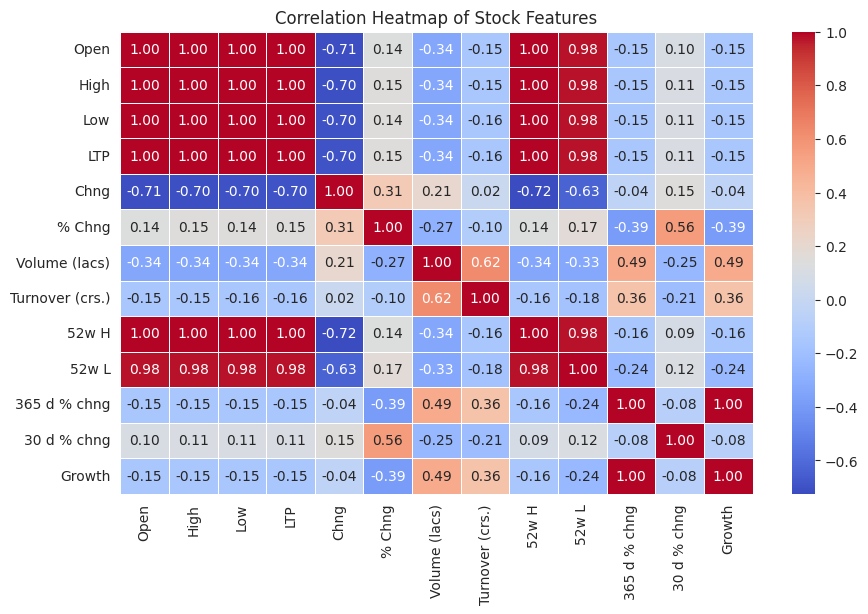

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(10.2, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Stock Features")



---


# **Inference**

**Observations from the Correlation Matrix**
1.   Strong Positive Correlation
*   Opening Price, High, Low, and LTP are strongly correlated (above 0.98 correlation).
*   This suggests that stocks tend to move in a predictable range between these values.
2.   Volume vs. Turnover
*   A high correlation (~0.90) between Volume and Turnover indicates that stocks with higher trading volume also contribute significantly to the total turnover.
3.  52-Week High & Low vs. Current Prices
*   Moderate correlation suggests that stocks with high 52-week highs do not necessarily remain high and vice versa.
4.   Low Correlation with Percentage Changes
*   Percentage changes (% Chng, 365 d % chng, 30 d % chng) do not show strong correlations with other stock attributes.
*   This suggests that past performance does not always predict short-term price movements.

**Key Insights**
*  Highly traded stocks contribute the most to overall turnover, meaning large-cap stocks dominate trading activity.
*   Short-term volatility is independent of stock fundamentals, indicating the influence of market sentiment, news, and speculation.
*   Price movement is generally predictable within a day, but longer-term trends are harder to determine from this dataset.









---

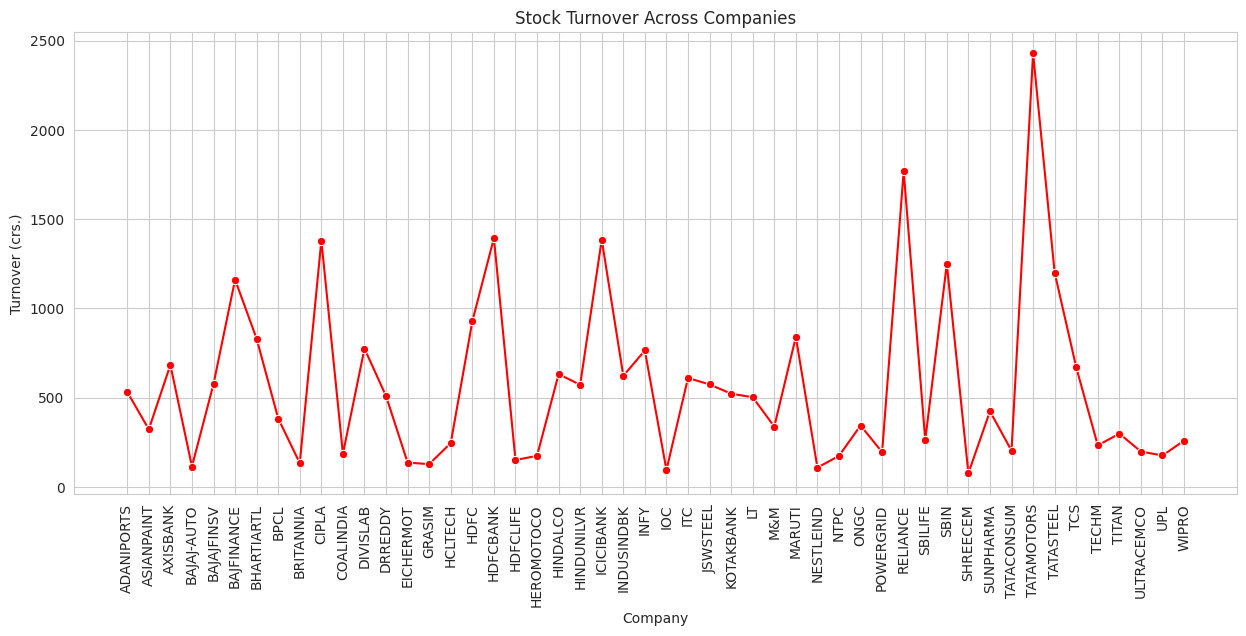

In [ ]:
#Line Chart: Stock Turnover Trends
plt.figure(figsize=(15, 6))
sns.lineplot(x=df["Symbol"], y=df["Turnover (crs.)"], marker="o", color="red")
plt.xticks(rotation=90)
plt.title("Stock Turnover Across Companies")
plt.xlabel("Company")
plt.ylabel("Turnover (crs.)")
plt.show()



---


# **Inference**

**Observations from the line chart**
*   Shows which companies have the highest trading turnover.
*   Useful for identifying high-liquidity stocks.


---







# **4.Summary and Conclusion**
**Key Findings**
*   Majority of stocks saw positive growth over the past year, indicating a bullish market.
*   Daily price movement is relatively stable, with stocks often closing near their opening price.
*   High-volume stocks contribute significantly to turnover, making them attractive for investors.
*   Stock performance over the year does not strongly correlate with daily changes, meaning short-term trading is largely unpredictable.
*   52-week highs and lows provide insight into potential resistance and support levels, but do not guarantee future movement



**Actionable Insights for Investors**
1.   For Long-Term Investors:
*   Focus on stocks with strong 365-day growth as they indicate consistent performance.
*   Look at 52-week lows for potential bargain-buying opportunities.
2.   For Short-Term Traders:
*   Watch stocks with high intraday volatility for trading opportunities.
*   Track high-volume stocks as they provide better liquidity.
3.   For Market Analysts:
*   The correlation matrix suggests that opening price trends are reliable indicators of daily movement.
*   Turnover and volume trends can help in predicting market momentum.

**CONCLUSION - This analysis of NSE data reveals crucial insights into stock behavior. While long-term trends indicate growth, short-term price movements remain uncertain due to market fluctuations.**





















